In [375]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScalar
from sklearn.decomposition import PCA

In [376]:
df = pd.read_csv('airlines_delay.csv')

In [377]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313,1296,141,DL,ATL,HOU,1,0
1,6948,360,146,OO,COS,ORD,4,0
2,1247,1170,143,B6,BOS,CLT,3,0
3,31,1410,344,US,OGG,PHX,6,0
4,563,692,98,FL,BMI,ATL,4,0


In [378]:
# x = df[["Time", "DayOfWeek", "Class"]].values

# x = df[["Time", "Length", "DayOfWeek", "Airline", "AirportFrom", "AirportTo", "Class"]].values

x_norm = df.iloc[:,1:]

# Trialing scalars
scaler = preprocessing.MinMaxScaler()
x_norm[["Time", "Length", "DayOfWeek", "Class"]] = scaler.fit_transform(x_norm[["Time", "Length", "DayOfWeek", "Class"]])
x_norm.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.899930,0.215267,DL,ATL,HOU,0.000000,0.0
1,0.244927,0.222901,OO,COS,ORD,0.500000,0.0
2,0.811756,0.218321,B6,BOS,CLT,0.333333,0.0
3,0.979706,0.525191,US,OGG,PHX,0.833333,0.0
4,0.477257,0.149618,FL,BMI,ATL,0.500000,0.0


In [379]:
# enc = OneHotEncoder()
# x_norm[["Airline","AirportFrom", "AirportTo"]] = enc.fit_transform(x_norm[["Airline","AirportFrom", "AirportTo"]])

x_norm = pd.get_dummies(x_norm, columns=["Airline","AirportFrom", "AirportTo"])

x_norm

,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,0.899930,0.215267,0.000000,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.244927,0.222901,0.500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.811756,0.218321,0.333333,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.979706,0.525191,0.833333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.477257,0.149618,0.500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,0.363891,0.109924,0.666667,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539378,0.384885,0.175573,0.500000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,0.571728,0.112977,0.166667,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,0.493352,0.099237,0.500000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [380]:
x_norm = x_norm.values

In [381]:
# WCSS = []
# for i in range(1,11):
#     model = KMeans(n_clusters = i,init = 'k-means++', n_init=10)
#     model.fit(x_norm)
#     WCSS.append(model.inertia_)
# fig = plt.figure(figsize = (7,7))
# plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
# plt.xticks(np.arange(11))
# plt.xlabel("Number of clusters")
# plt.ylabel("WCSS")
# plt.show()

In [306]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x_norm)

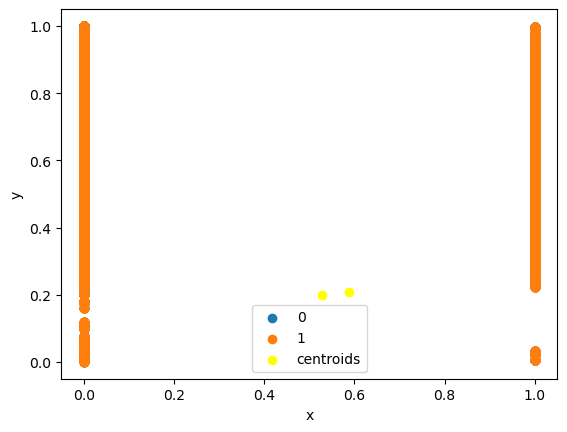

In [383]:
u_labels = np.unique(y_clusters)
for i in u_labels:
    plt.scatter(x_norm[y_clusters == i,5],x_norm[y_clusters == i,0], label = i)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c = "yellow", label = "centroids")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

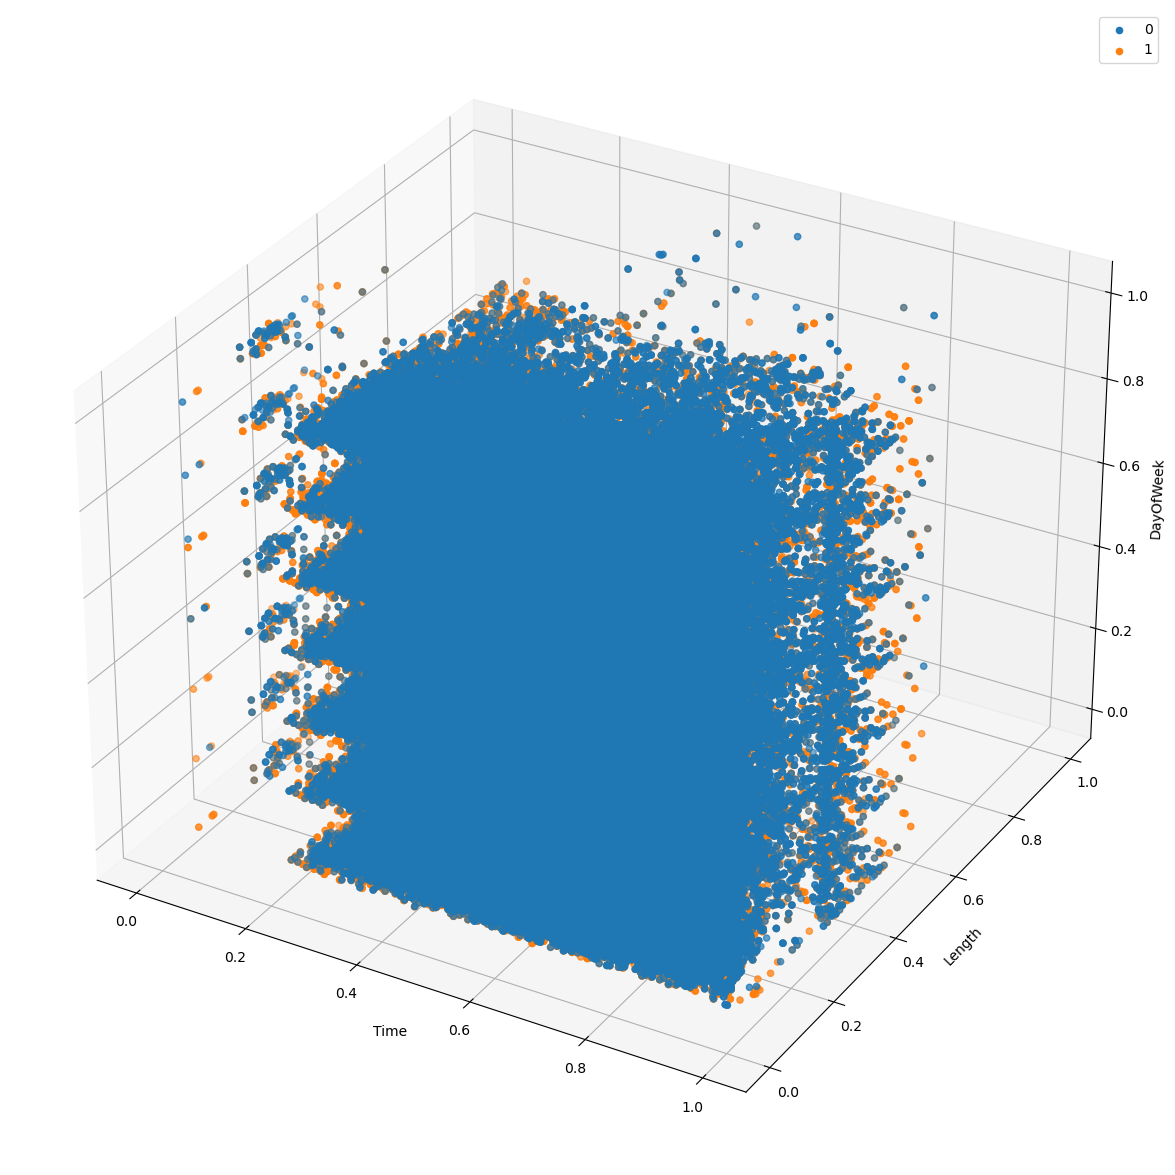

In [308]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
for i in u_labels:
    ax.scatter(x_norm[y_clusters == i,0],x_norm[y_clusters == i,1],x_norm[y_clusters == i,2], label = i)
#     ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
#     ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
#     ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
#     ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Time')
ax.set_ylabel('Length')
ax.set_zlabel('DayOfWeek')
ax.legend()
plt.show()